# Test Tuned Models

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from pathlib import Path
import os
import glob
from datetime import datetime

import model.hyperparameters as hp
from model.seq2seq_LSTM import Encoder, Decoder
from utils.train import LSTM_train_fn
from utils.dataset import (
    SmartwatchDataset, 
    SmartwatchAugmentLstm,
    SmartwatchAugmentTransformer, 
    get_file_lists
)
from utils.utils import test_LSTM

#LSTM_SAVE_PATH = Path('/root/jonathan/syde770-project/best_models/lstm/15-04-2023_161225')
LSTM_SAVE_PATH = Path('/root/jonathan/syde770-project/outputs/17-04-2023_231059')
CNN_LSTM_SAVE_PATH = Path('/root/jonathan/syde770-project/best_models/cnn-lstm/17-04-2023_190141')
TRANSFORMER_SAVE_PATH = Path('')
CNN_TRANSFORMER_SAVE_PATH = Path('/root/jonathan/syde770-project/best_models/cnn-transformer/17-04-2023_160328')

In [2]:
# Get .csv files
train_files, val_files, test_files = get_file_lists(
    val_sub_list=['05', 10, 15, 20, 25, 30],
    test_sub_list=[35], 
)

# Get dataloaders
lstm_test_dataset = SmartwatchDataset(test_files)
lstm_test_loader = torch.utils.data.DataLoader(lstm_test_dataset, batch_size=hp.BATCH_SIZE, collate_fn=SmartwatchAugmentLstm(), drop_last=True, shuffle=False)

cnnlstm_test_dataset = SmartwatchDataset(test_files)
cnnlstm_test_loader = torch.utils.data.DataLoader(cnnlstm_test_dataset, batch_size=hp.BATCH_SIZE, collate_fn=SmartwatchAugmentLstm(), drop_last=True, shuffle=False)

transformer_test_dataset = SmartwatchDataset(test_files)
transformer_test_loader = torch.utils.data.DataLoader(transformer_test_dataset, batch_size=hp.BATCH_SIZE, collate_fn=SmartwatchAugmentTransformer(), drop_last=True, shuffle=False)

cnntransformer_test_dataset = SmartwatchDataset(test_files)
cnntransformer_test_loader = torch.utils.data.DataLoader(cnntransformer_test_dataset, batch_size=hp.BATCH_SIZE, collate_fn=SmartwatchAugmentTransformer(), drop_last=True, shuffle=False)

## Test LSTM After Tuning

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.137579431603837 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


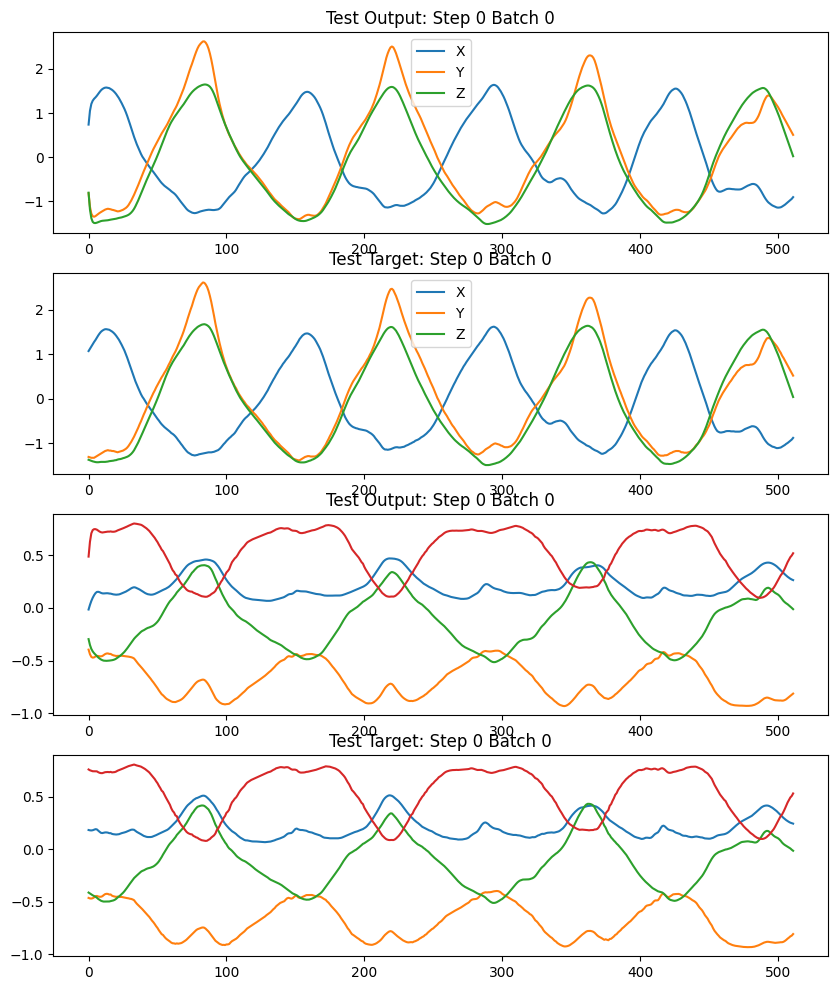

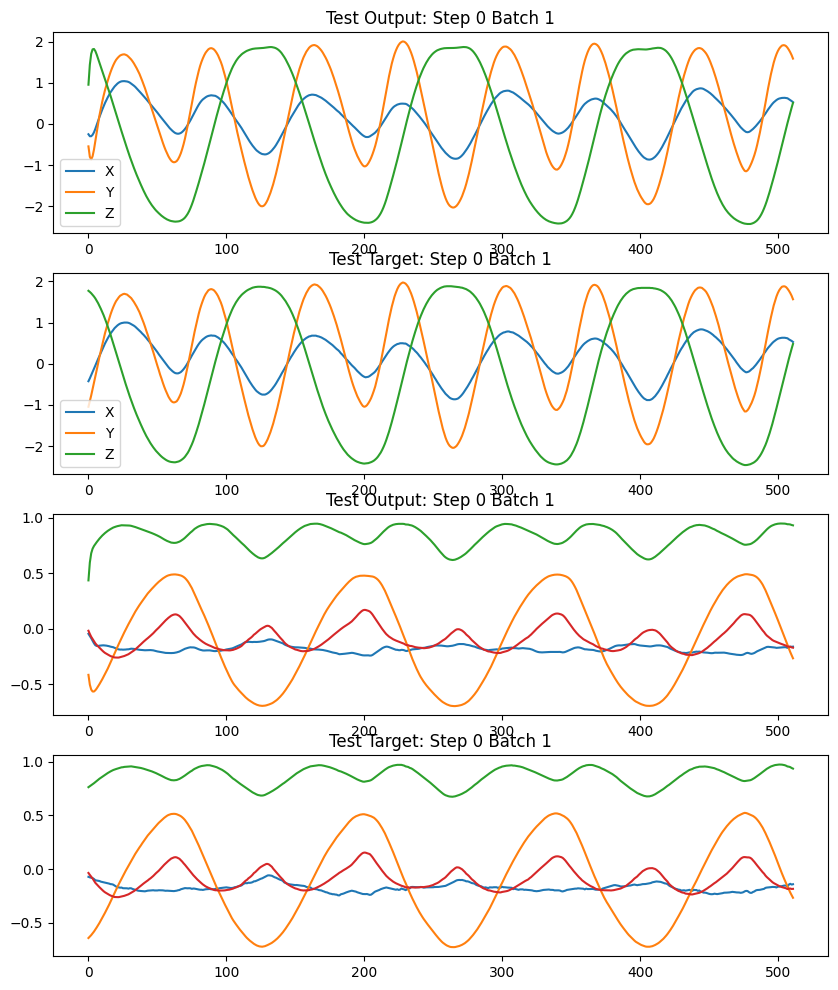

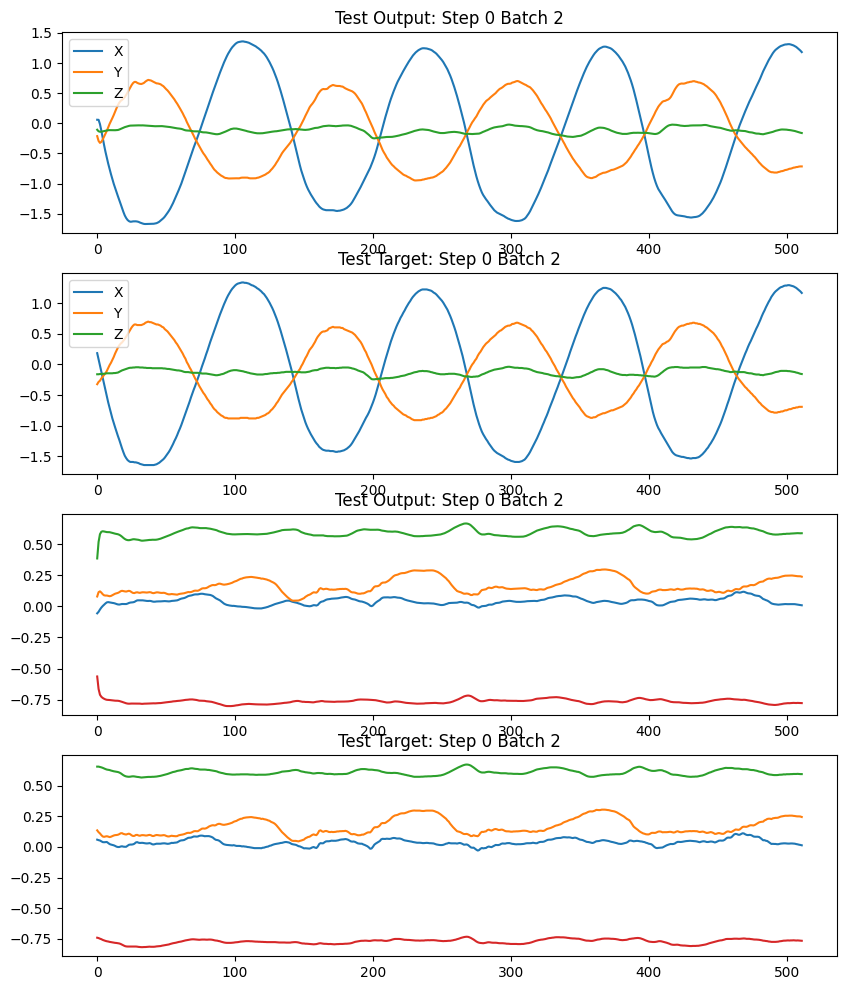

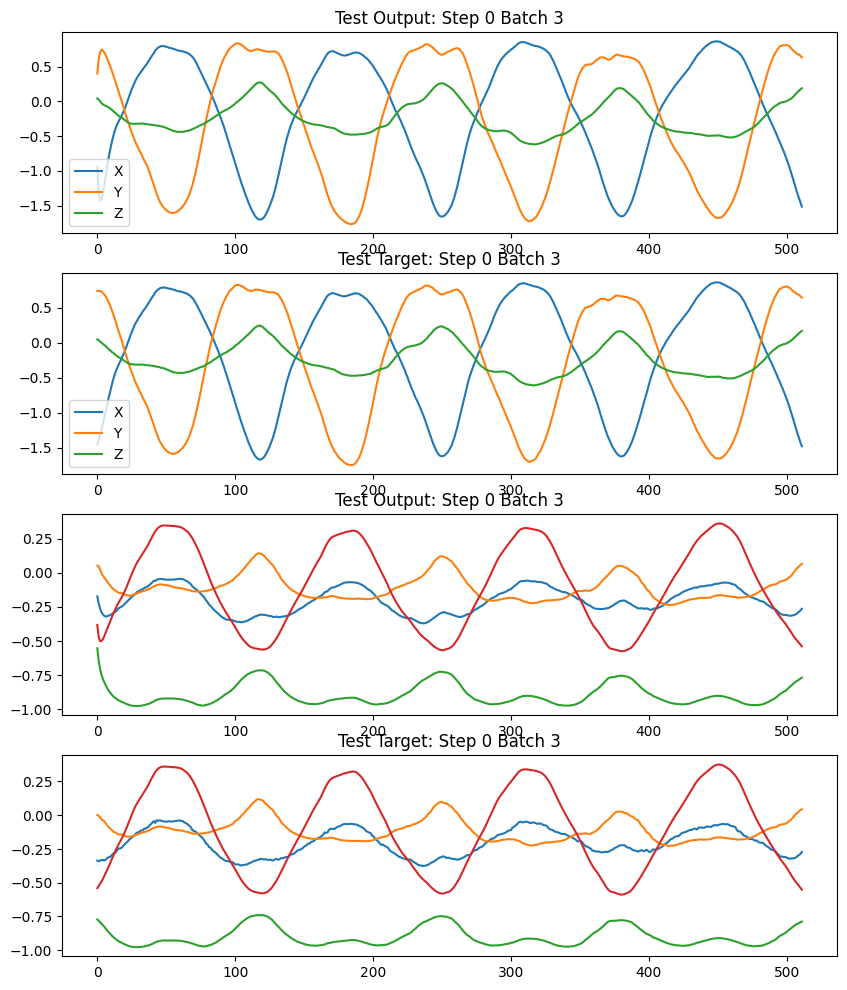

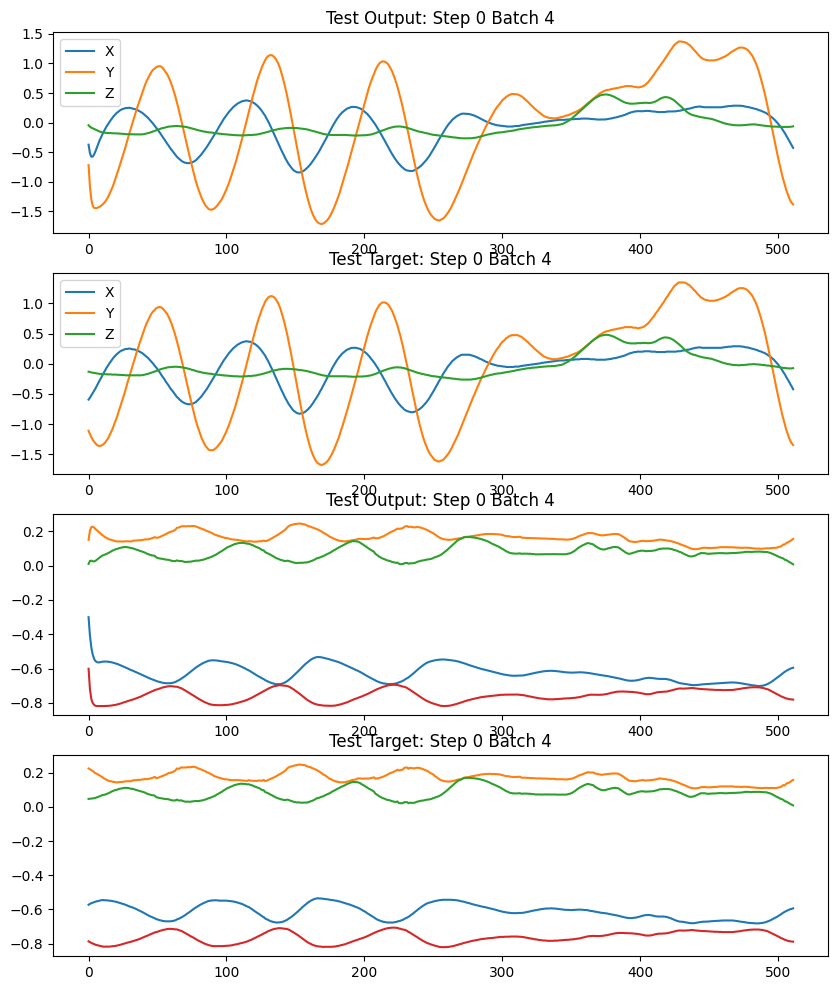

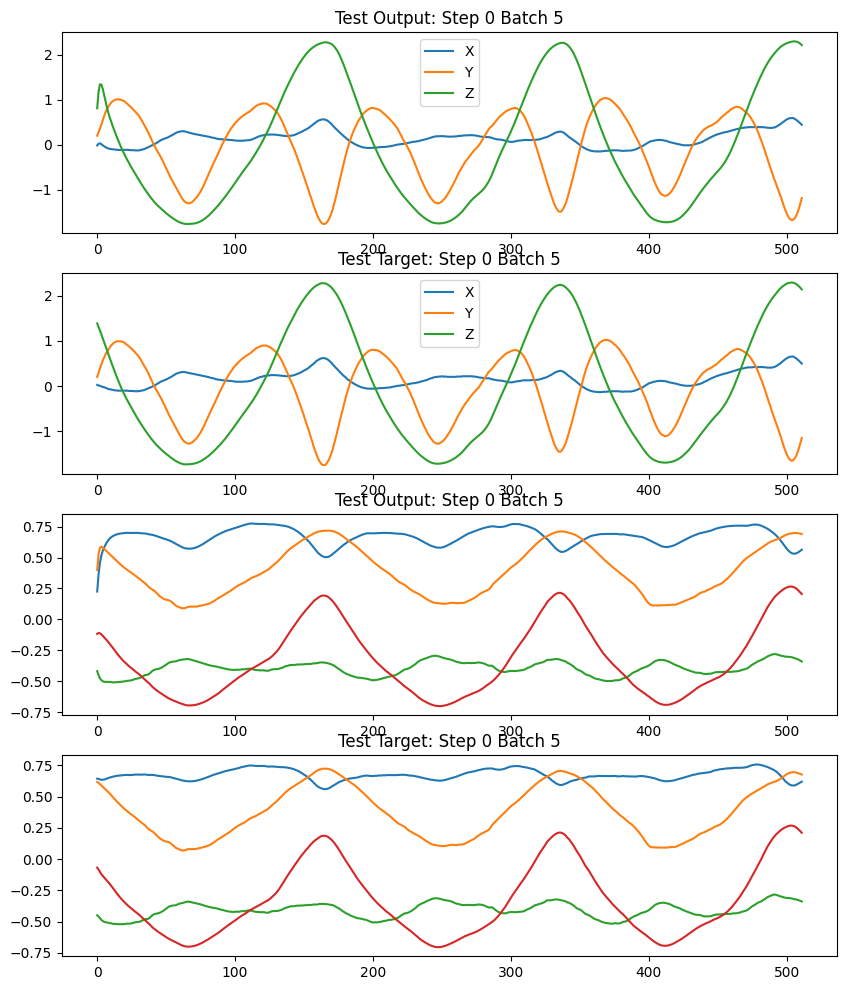

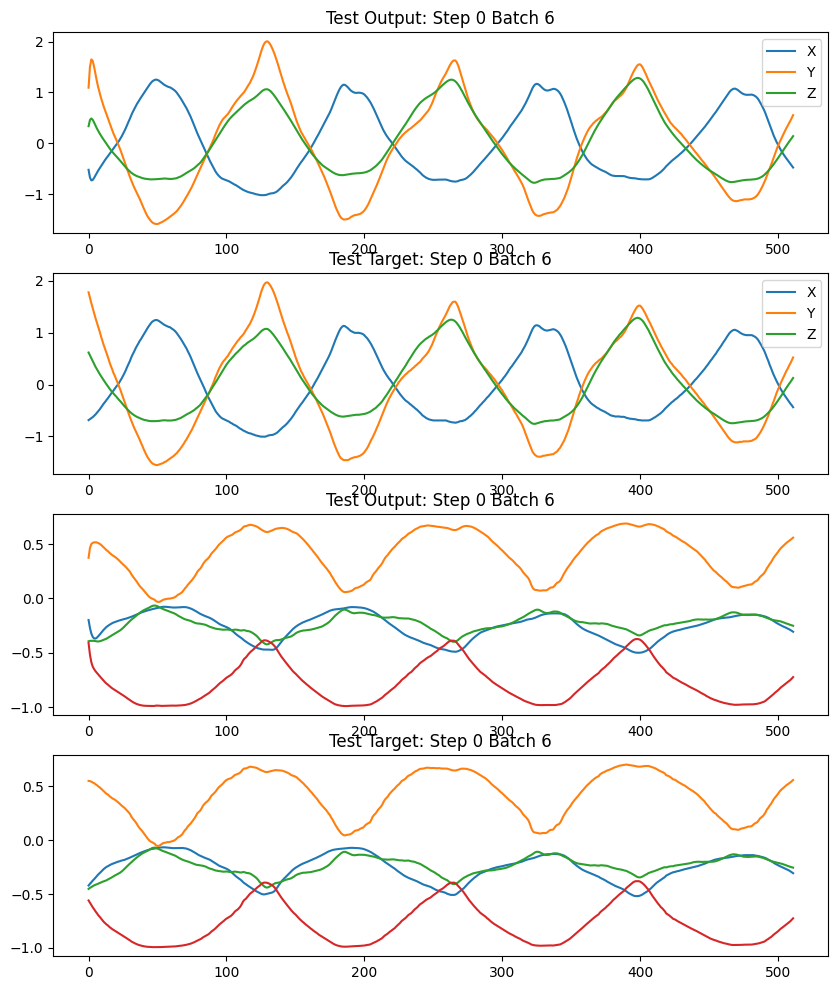

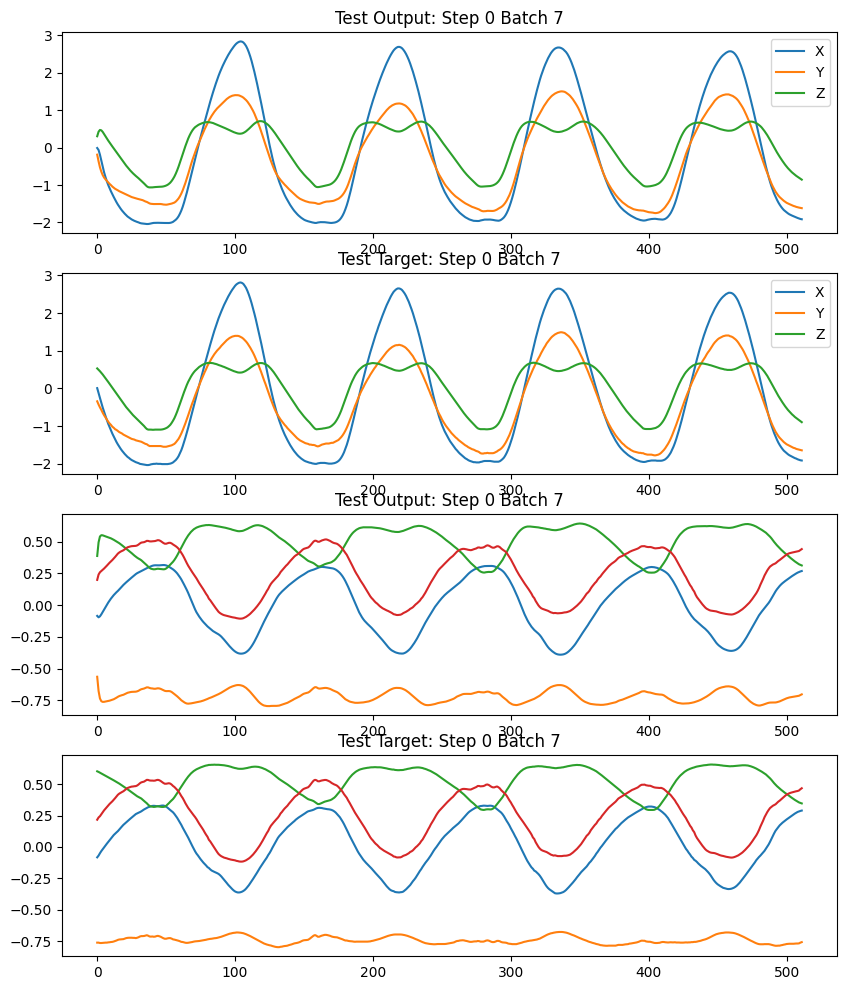

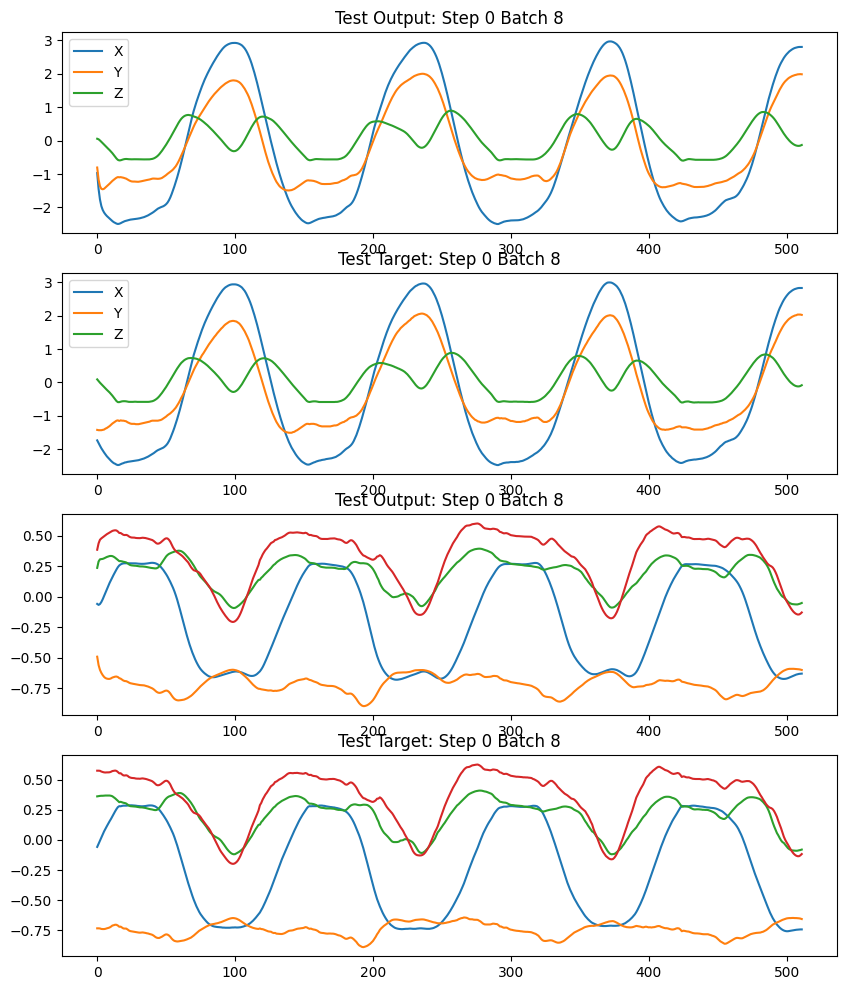

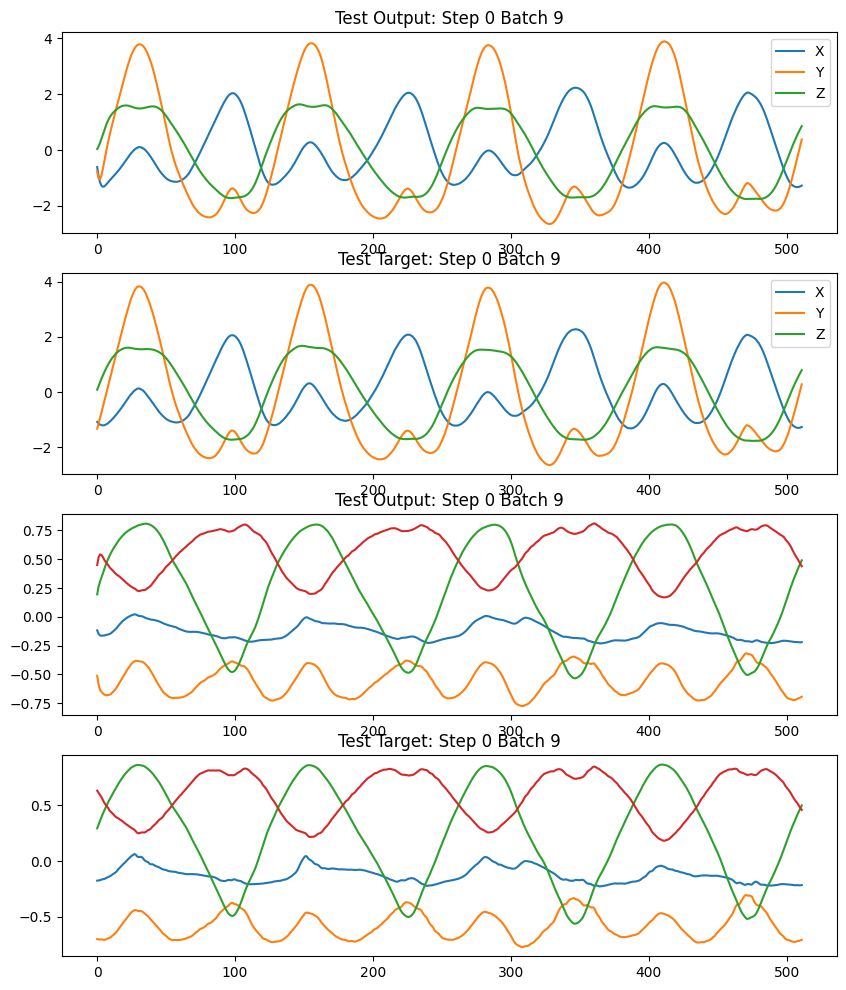

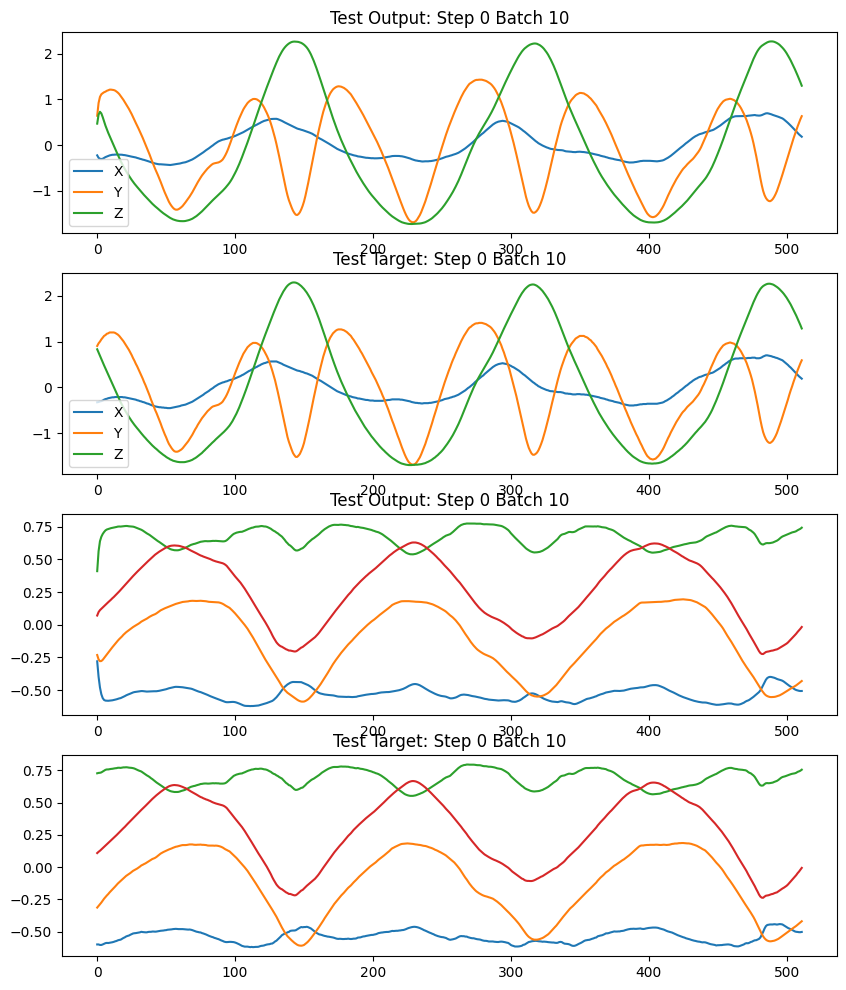

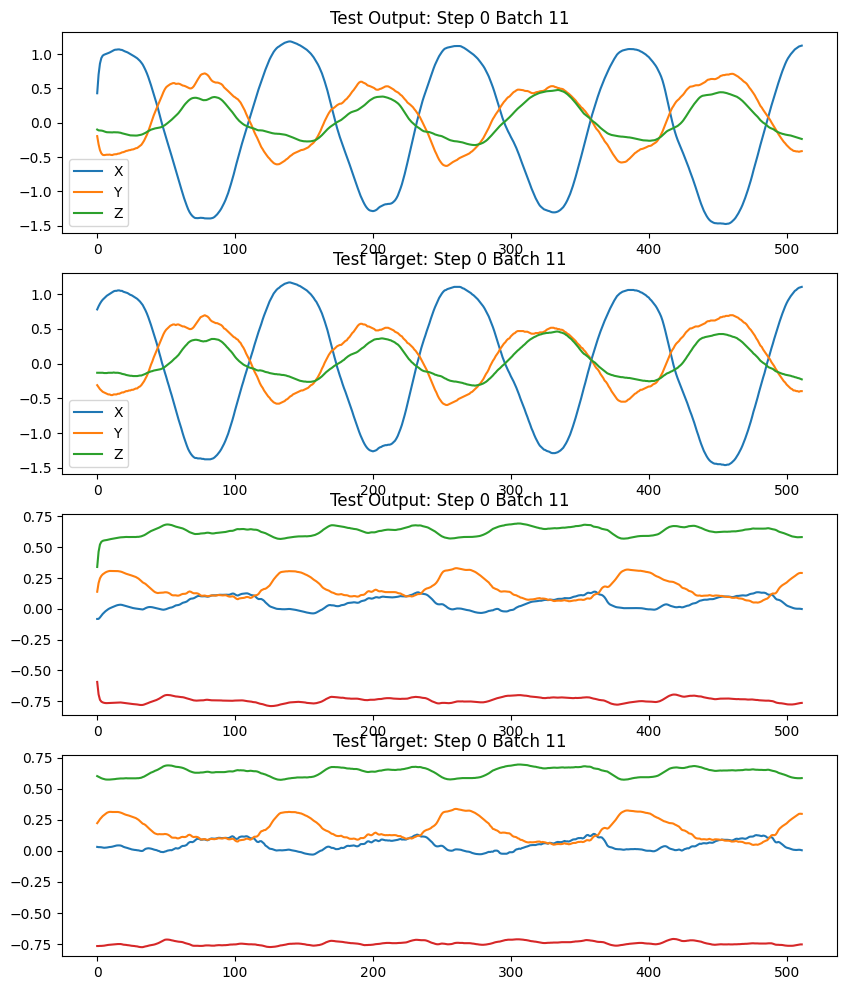

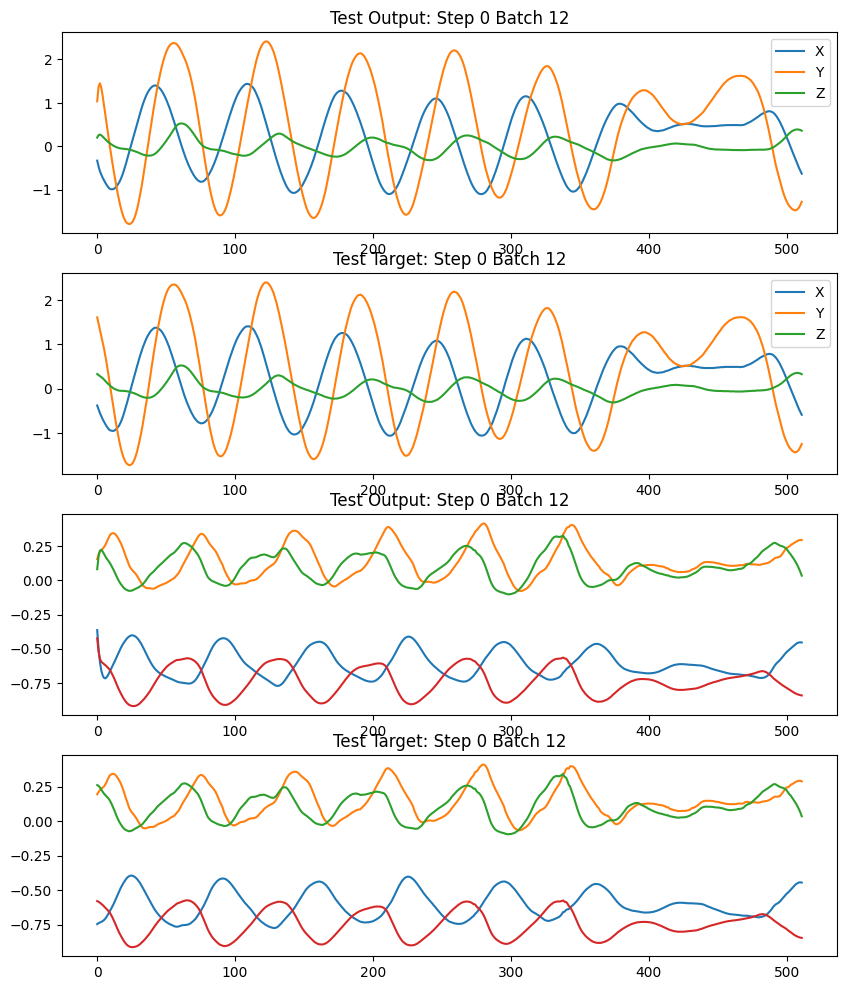

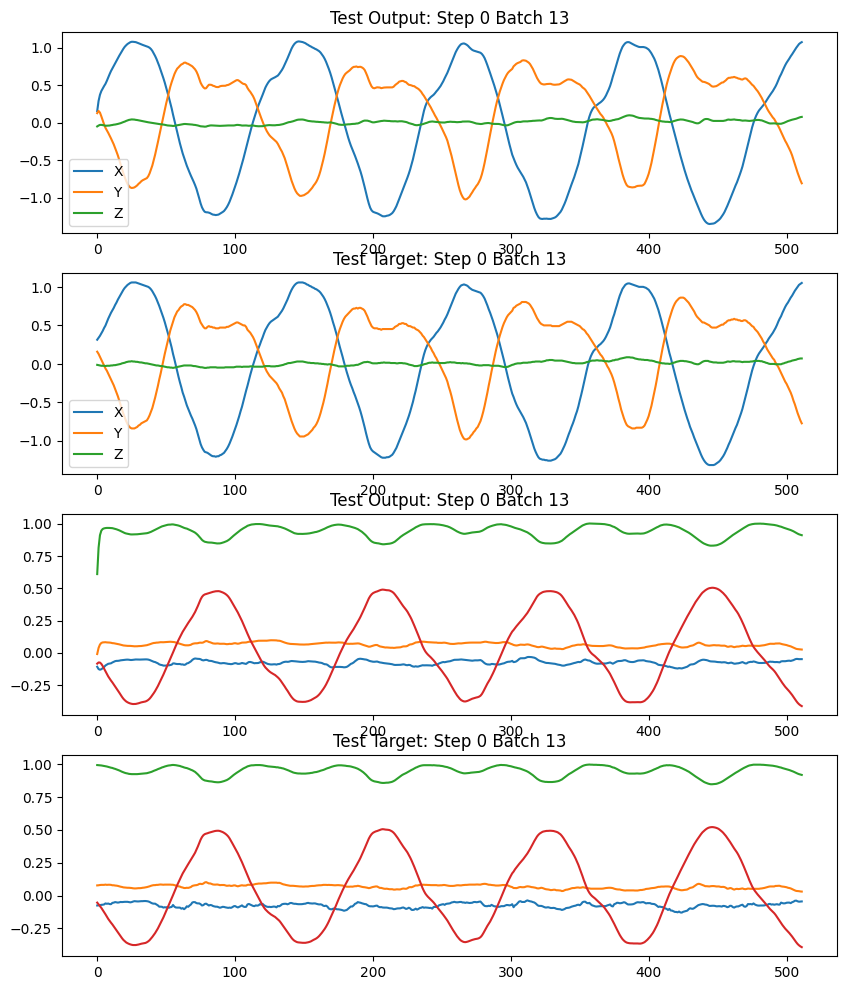

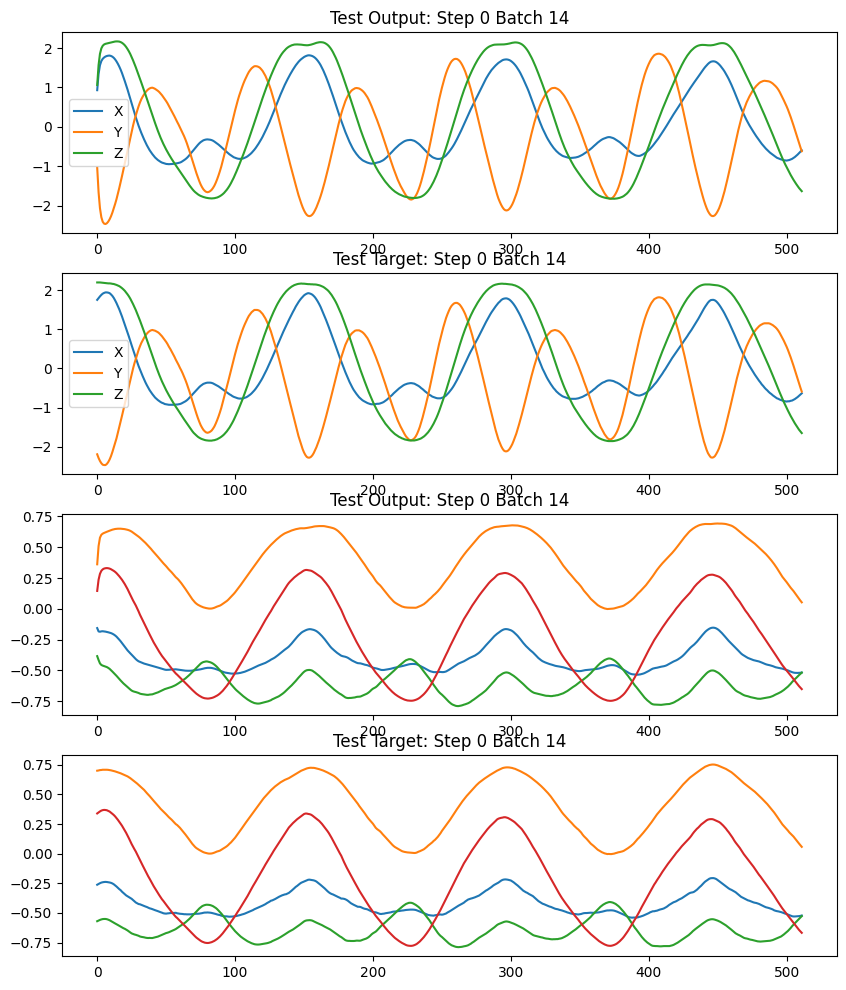

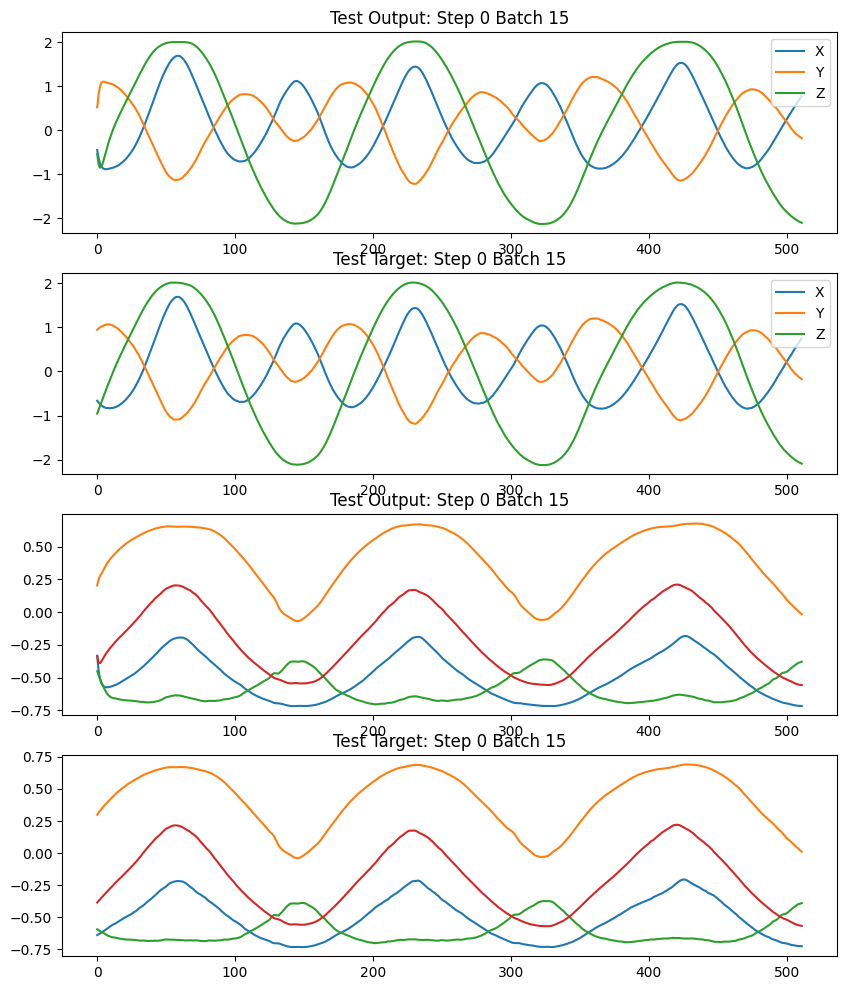

Test Loss: 0.0007663051364943385
Test Metric: 0.017181895673274994


In [3]:

# Initialize encoder and decoder
encoder_model = Encoder(
    input_size=9,
    hidden_size=32,
    num_layers=1,
    dropout_p=0.137579431603837,
    channels=9,
    stride=2,
    kernel_size=63,
    seq_len=1024,
    downsample=False,
).to(hp.DEVICE)
decoder_model = Decoder(
    input_size=7,
    hidden_size=32,
    output_size=7,
    num_layers=1,
    dropout_p=0.137579431603837,
).to(hp.DEVICE)

# Initialize loss functions
loss_fn = nn.MSELoss()
metric_loss_fn = nn.L1Loss()

test_LSTM(
    lstm_test_loader,
    encoder_model,
    decoder_model,
    loss_fn,
    metric_loss_fn,
    LSTM_SAVE_PATH,
    hp.DEVICE,
)

## Test CNN-LSTM After Tuning

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0725343342977065 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


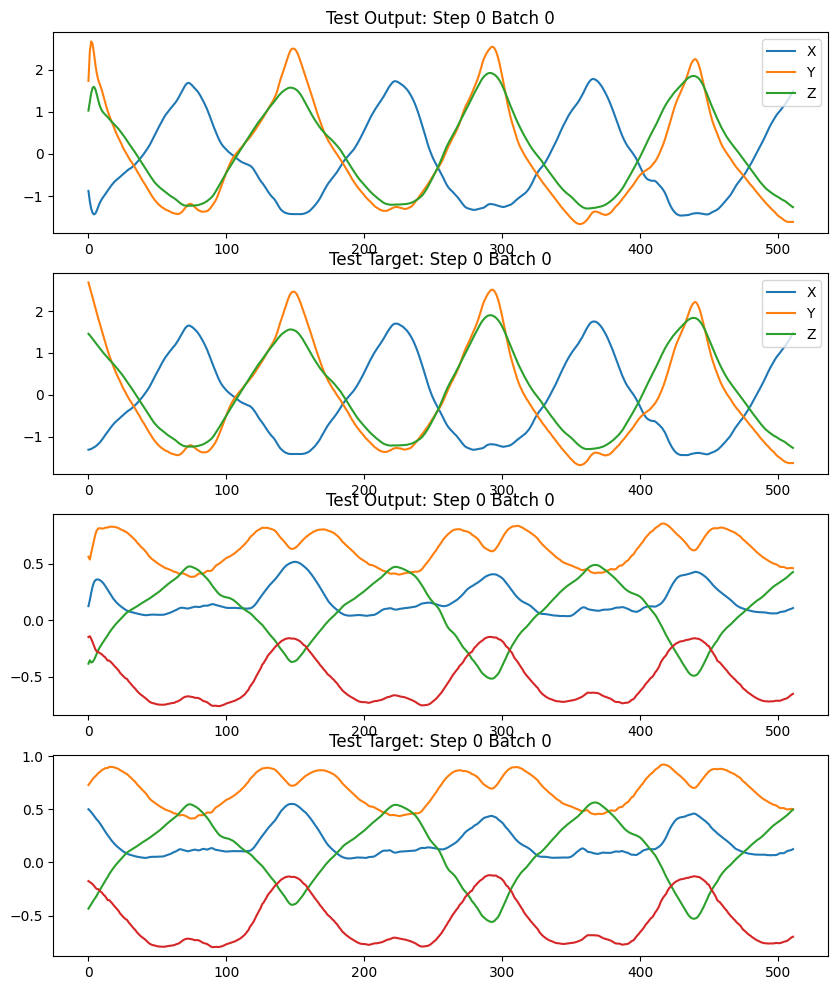

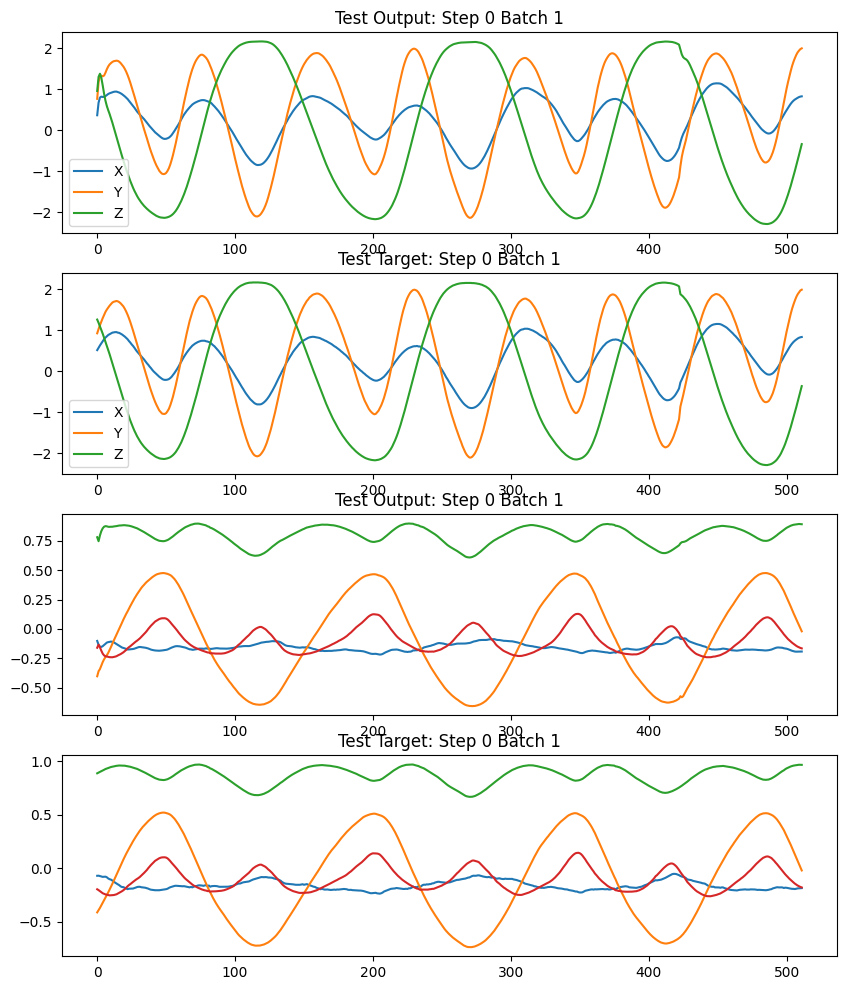

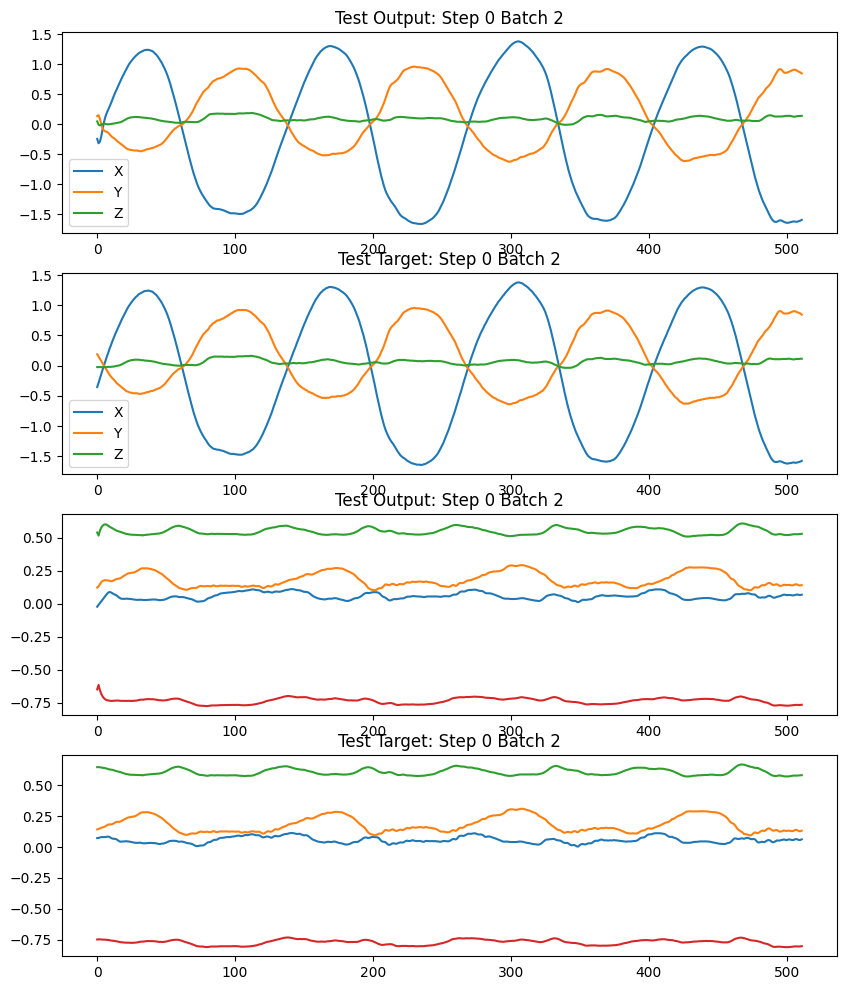

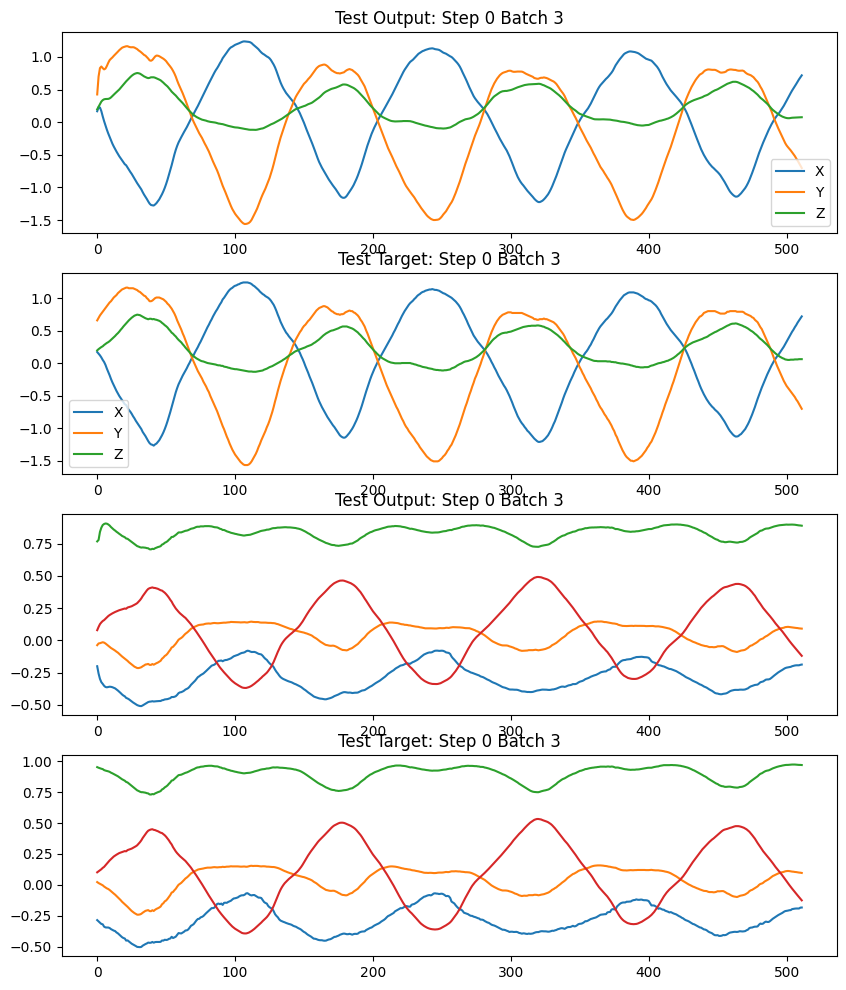

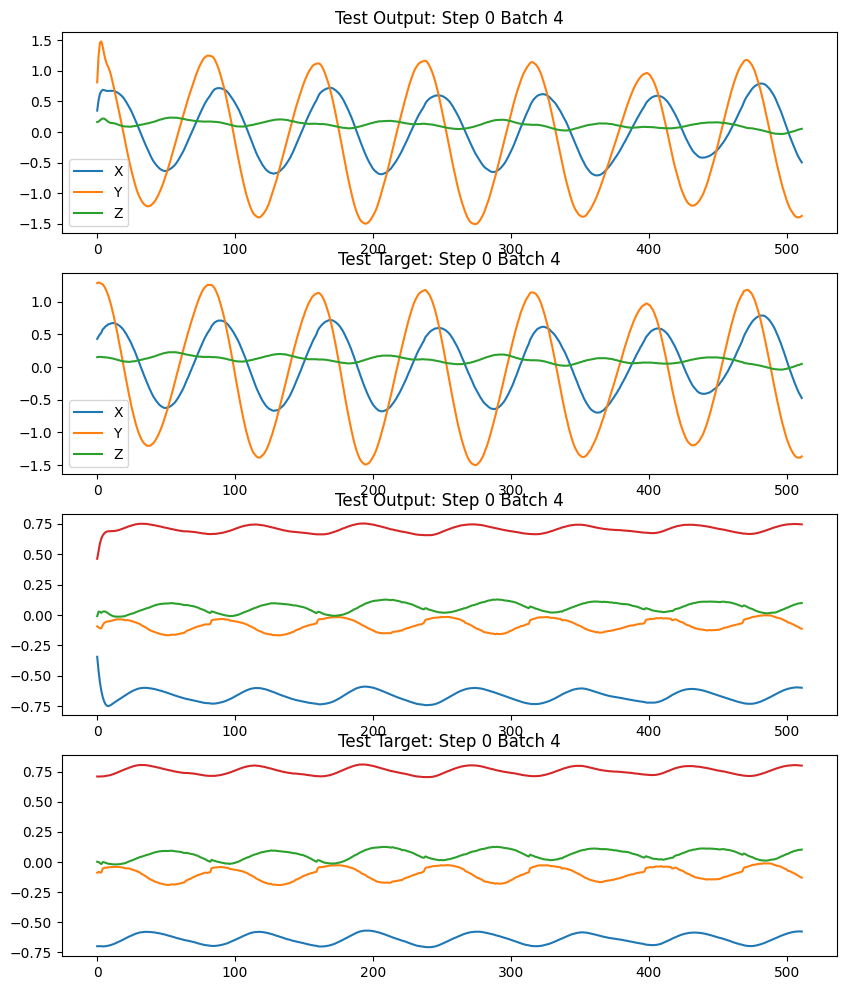

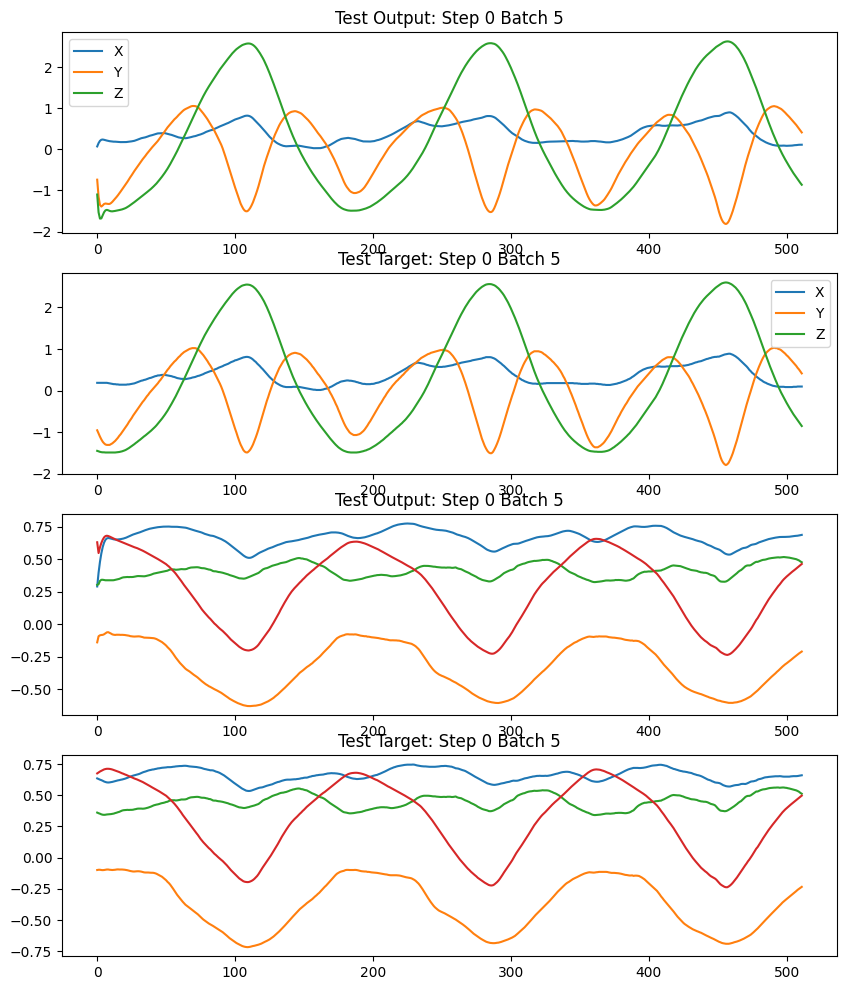

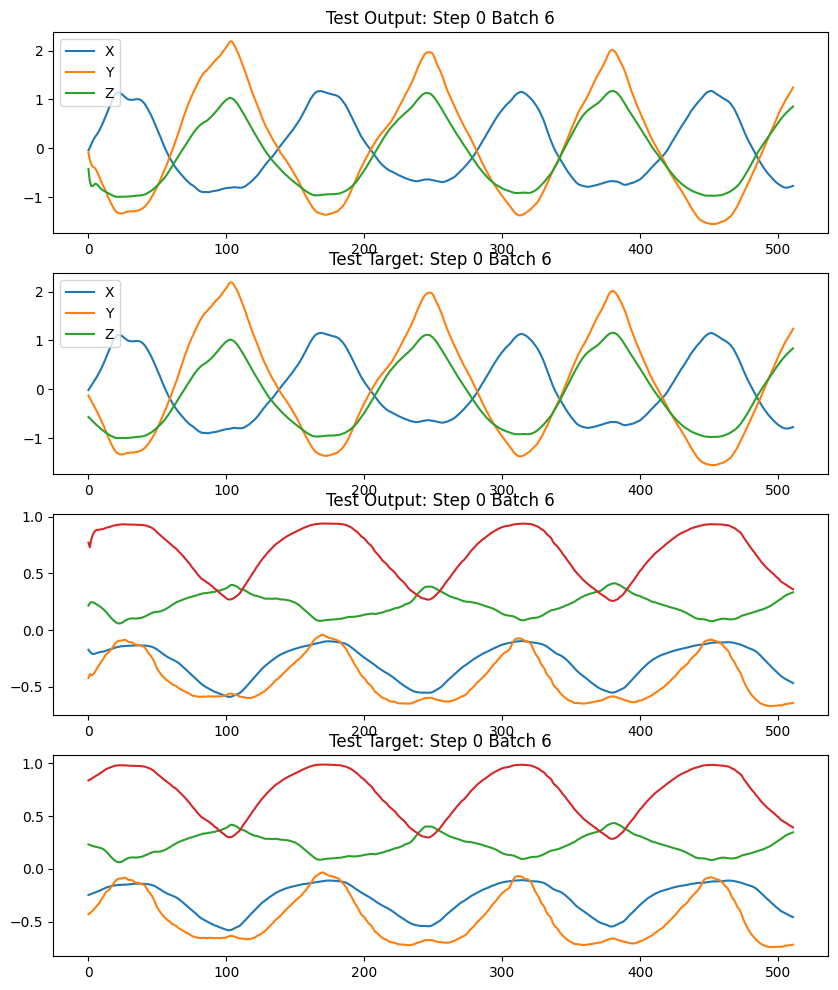

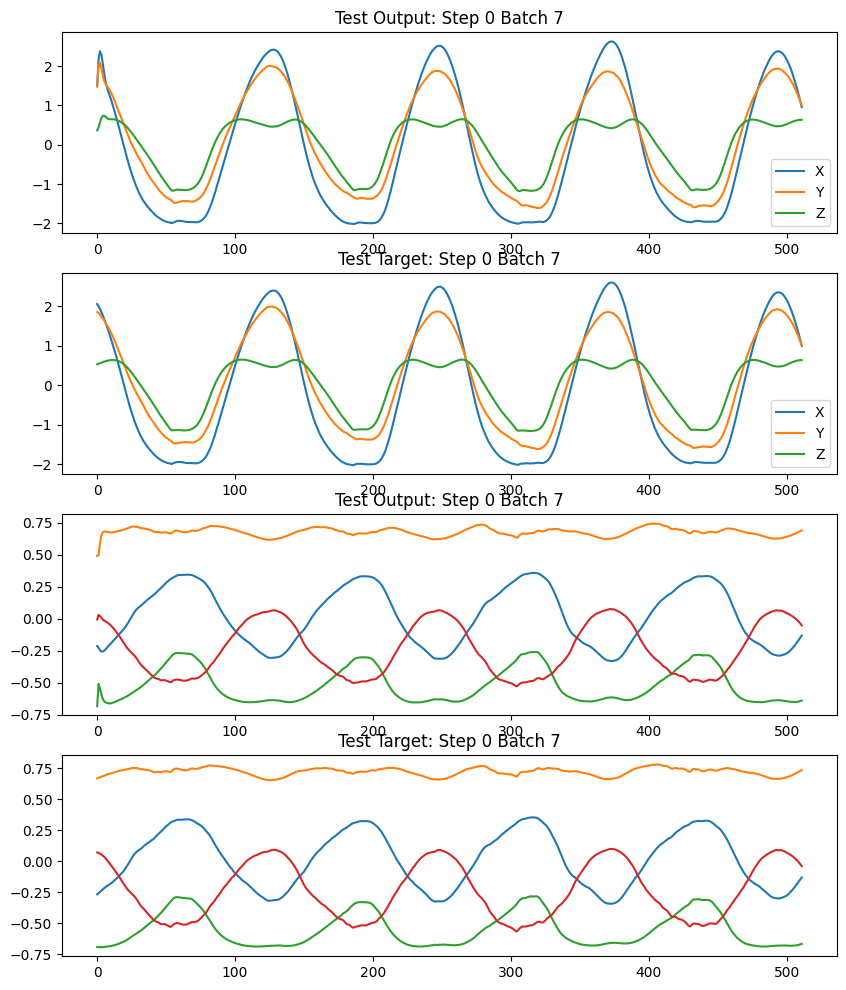

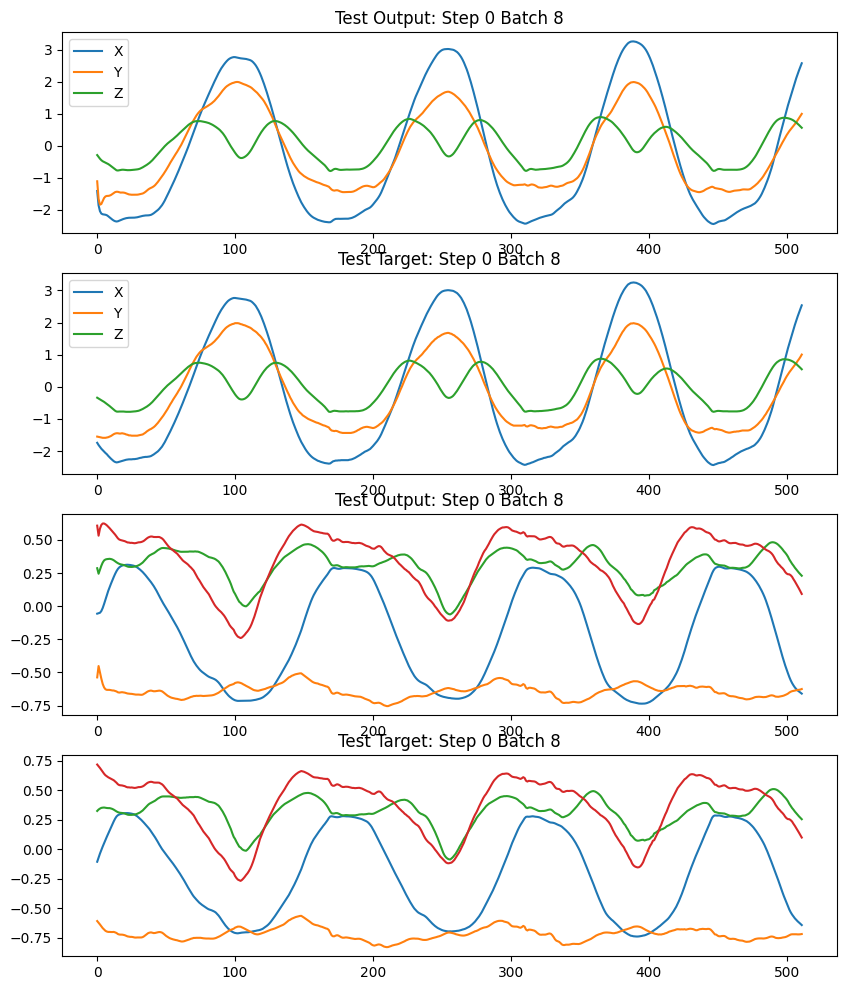

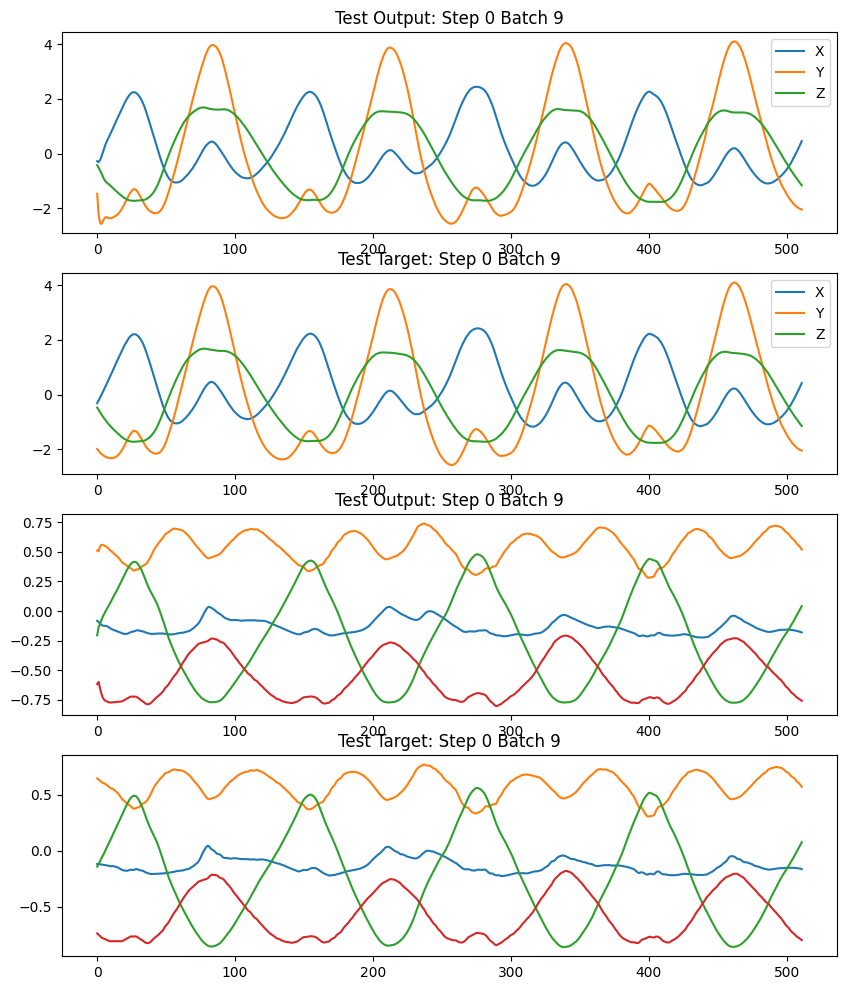

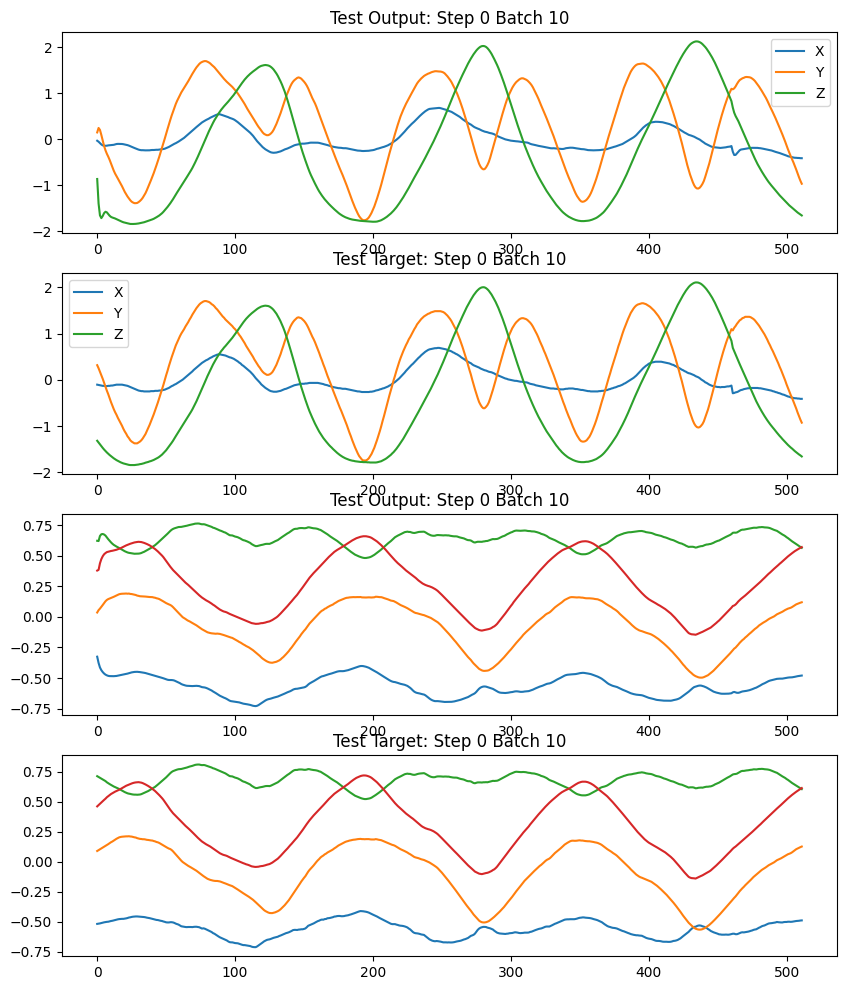

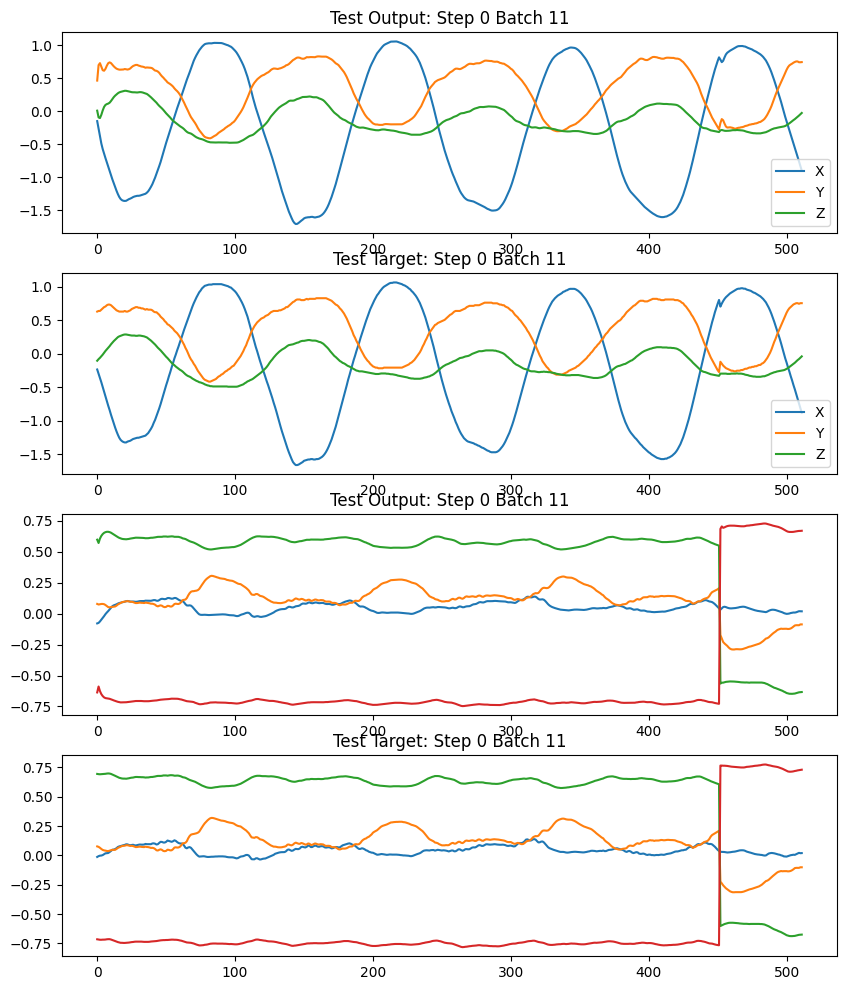

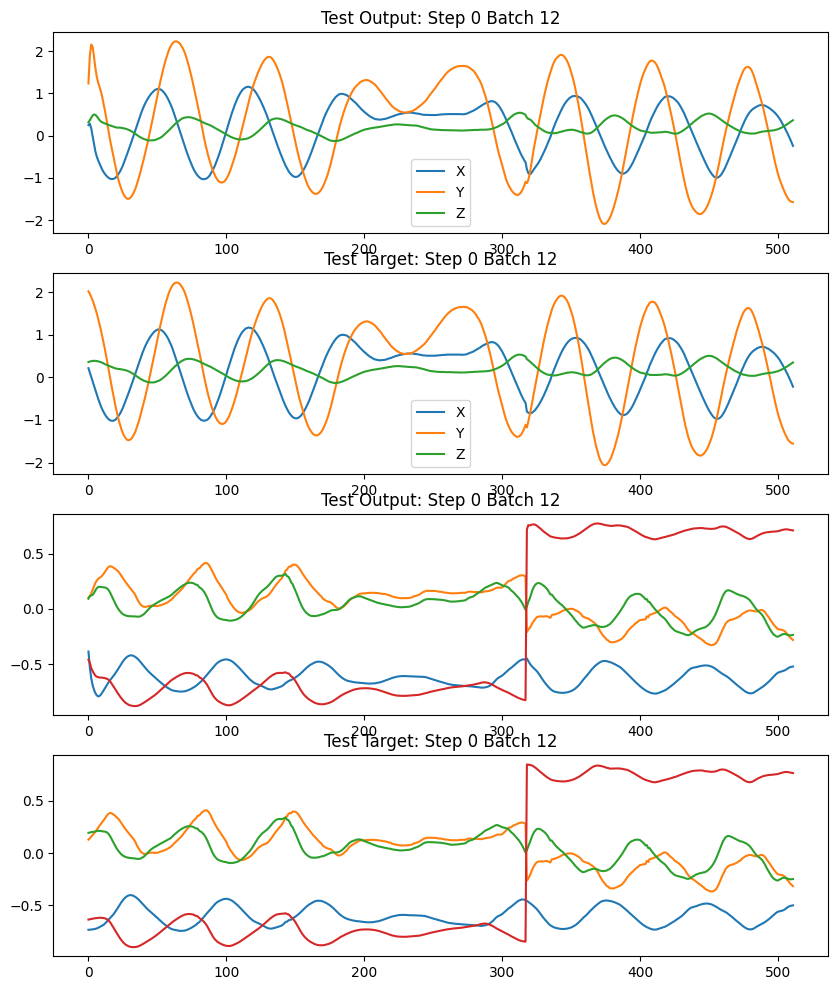

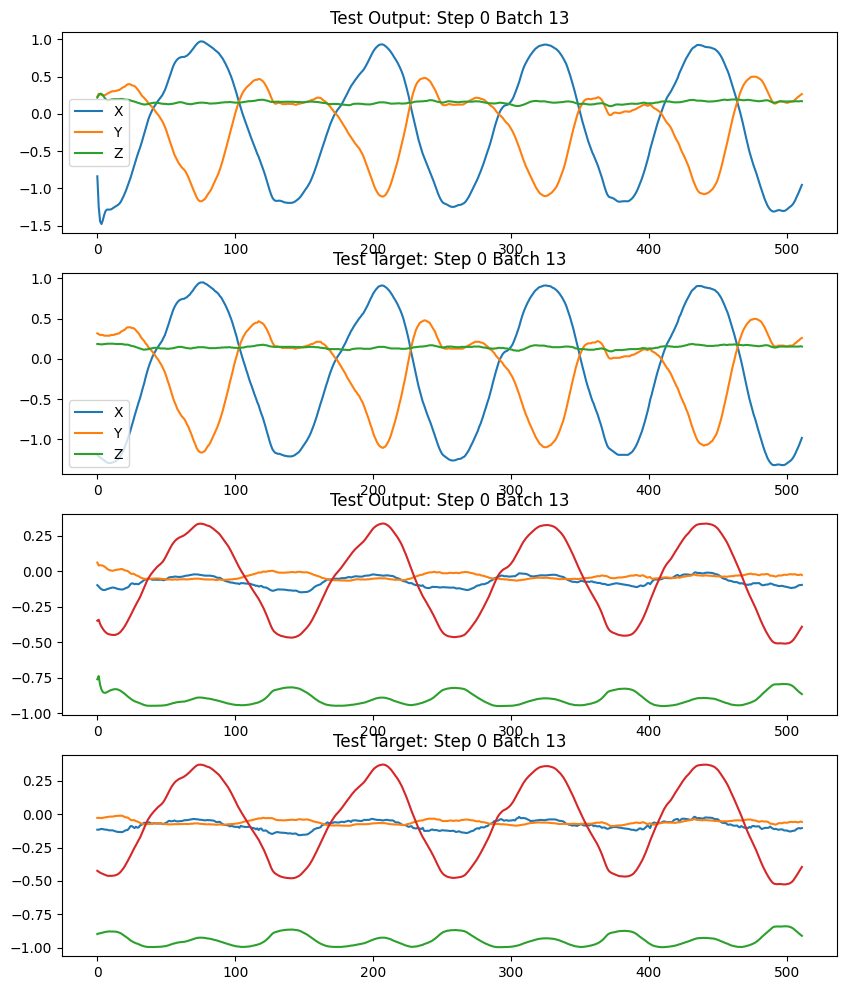

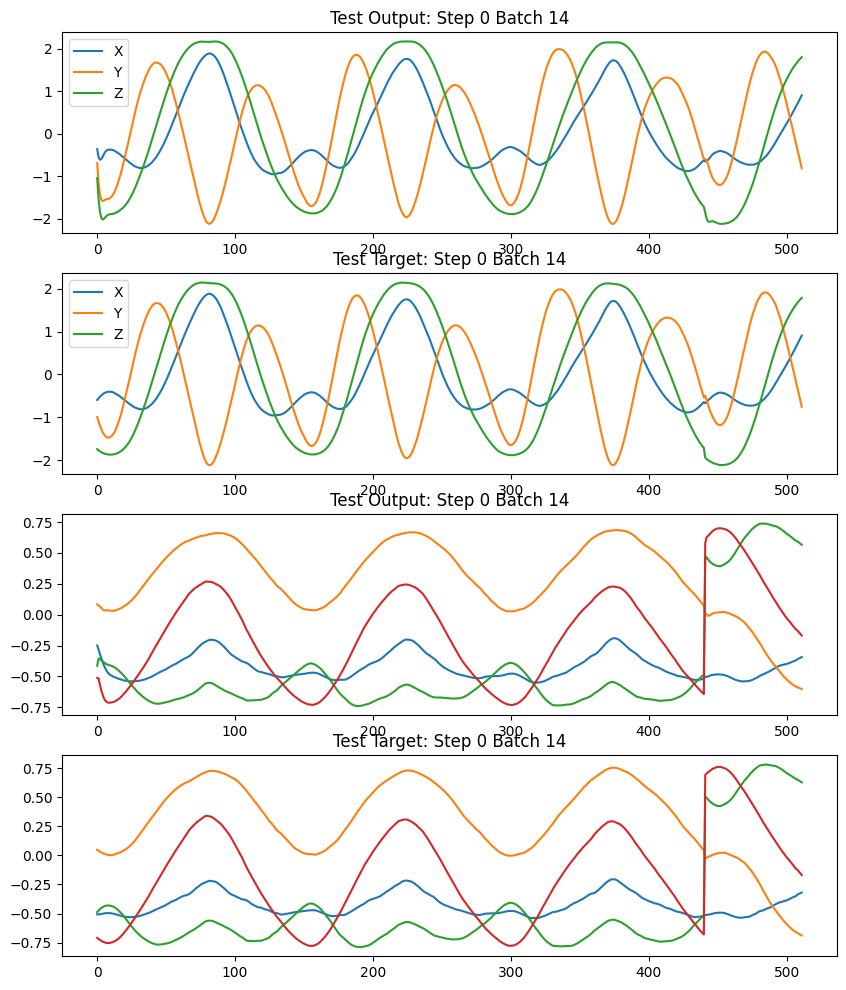

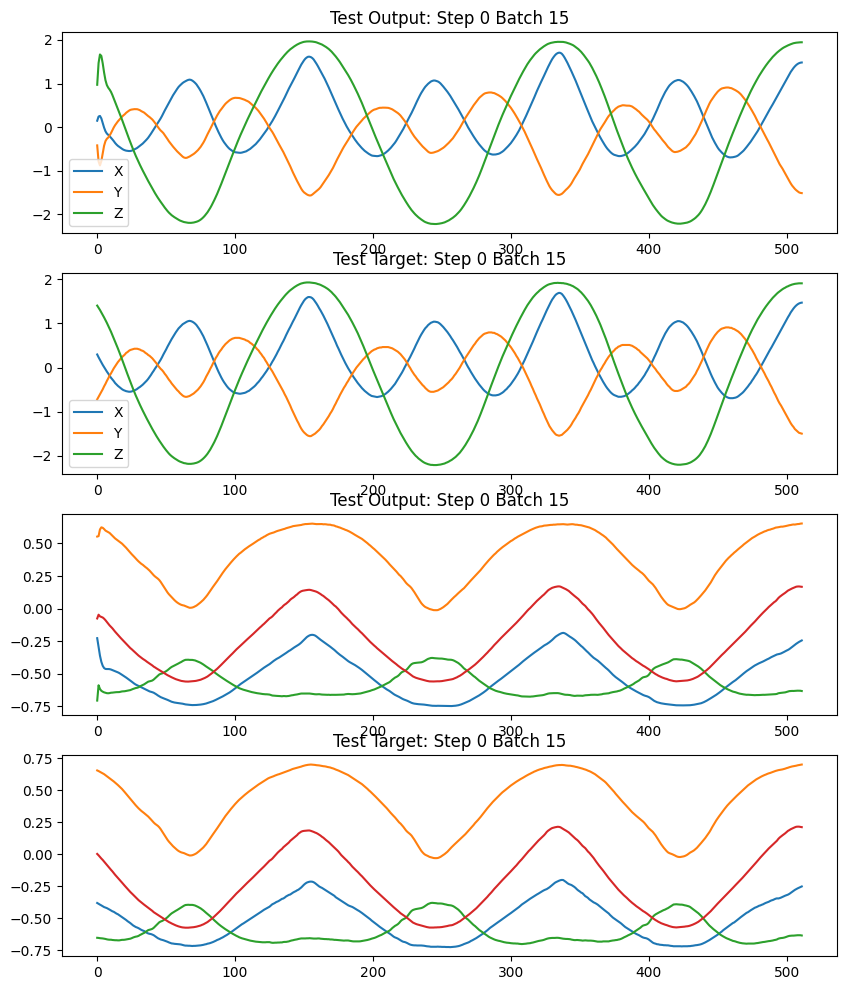

Test Loss: 0.0010774004040285945
Test Metric: 0.023709068074822426


In [4]:
# Initialize encoder and decoder
encoder_model = Encoder(
    input_size=9,
    hidden_size=64,
    num_layers=1,
    dropout_p=0.0725343342977065,
    channels=64,
    stride=2,
    kernel_size=63,
    seq_len=1024,
    downsample=True,
).to(hp.DEVICE)
decoder_model = Decoder(
    input_size=7,
    hidden_size=64,
    output_size=7,
    num_layers=1,
    dropout_p=0.0725343342977065,
).to(hp.DEVICE)

# Initialize loss functions
loss_fn = nn.MSELoss()
metric_loss_fn = nn.L1Loss()

test_LSTM(
    cnnlstm_test_loader,
    encoder_model,
    decoder_model,
    loss_fn,
    metric_loss_fn,
    CNN_LSTM_SAVE_PATH,
    hp.DEVICE,
)

# Test CNN Transformer After Tuning

In [5]:
import torch
import pandas as pd
import numpy as np
from utils.utils import test_Transformer
from model.Transformer import TransformerModel

rng = np.random.default_rng()

In [6]:
# Initialize transformer
transformer_model = TransformerModel(
    input_size=9,
    d_model=128,
    dropout=0.08700484164091785,
    n_heads=int(128/4),
    stride=2,
    kernel_size=15,
    seq_len=1024,
    downsample=True,
    output_size=7,
    num_encoder_layers=5,
    num_decoder_layers=5
).to(hp.DEVICE)

# Initialize loss functions
loss_fn = nn.MSELoss()
metric_loss_fn = nn.L1Loss()

test_Transformer(
    cnntransformer_test_loader,
    transformer_model,
    loss_fn,
    metric_loss_fn,
    CNN_TRANSFORMER_SAVE_PATH,
    hp.DEVICE,
)

TypeError: permute(): argument 'input' (position 1) must be Tensor, not PackedSequence